<h2>Assignment 1 - Linear Regression on Boston Housing Data</h2>

In [ ]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

# Reference: http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
diabetes = datasets.load_diabetes()

In [ ]:
# Load data from scikit-learn
print(diabetes.data.shape)
print(diabetes.target.shape)
data = diabetes.data
target = diabetes.target

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

(442, 10)
(442,)


<h4>Task 1: Use scikit-learn library in the following cell</h4>

In [ ]:
# Task 1-1: use linear regression in sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(train_data, train_target)
trainPredictions = model.predict(train_data)
testPredictions = model.predict(test_data)

# Task 1-2: show intercept and coefficents
intercept = model.intercept_[0]
coefficients = model.coef_[0]

print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Task 1-3: show errors on training dataset and testing dataset
print("model training error :", 0.5 * mean_squared_error(train_target, trainPredictions))
print("model testing error: ", 0.5 * mean_squared_error(test_target, testPredictions))

Intercept: 151.34560453985995
Coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
model training error : 1434.2748514177886
model testing error:  1450.096814246741


<h4>Task 2: Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

In [ ]:
# Task 2-1: Implement a function solving normal equation
# Inputs: Training data and  training label
# Output: Weights
def myNormalEqualFun(X,y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return np.dot(X, w)

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)

# Task 2-3: show intercept and coefficents
intercept = w[0]
coefficients = w[1:]

print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Task 2-4: show errors on training dataset and testing dataset
y_train_predicition = myPredictFun(train_data_intercept, w)
y_test_prediction = myPredictFun(test_data_intercept, w)

print("model training error :", 0.5 * np.mean((y_train_predicition - train_target) ** 2))
print("model testing error: ", 0.5 * np.mean((y_test_prediction - test_target) ** 2))



Intercept: [151.34560454]
Coefficients: [[  37.90402135]
 [-241.96436231]
 [ 542.42875852]
 [ 347.70384391]
 [-931.48884588]
 [ 518.06227698]
 [ 163.41998299]
 [ 275.31790158]
 [ 736.1988589 ]
 [  48.67065743]]
model training error : 1434.2748514177888
model testing error:  1450.0968142467398


<h4>Task 3: Use numerical solution (baisc gradient descent) to perform linear regression in the following cell</h4>

Intercept: 153.72990691097522
Coefficients: [  1.94483978 -11.42269492  26.31775084  16.57571791  -6.52876639
  -4.81161938  -9.29112174   7.52396684  20.70061248   2.66702455]
Training MSE: 1447.3700094942246
Testing MSE: 1442.4614014937467


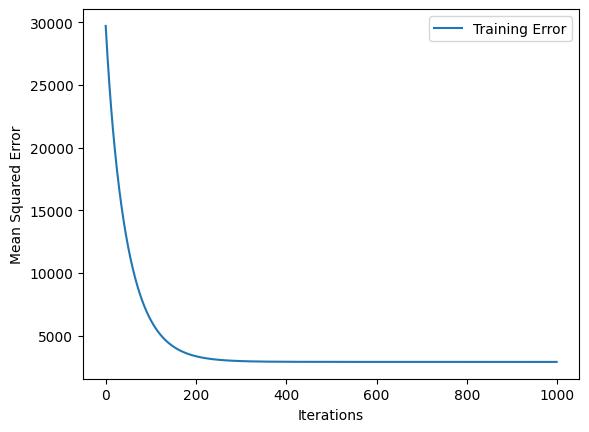

In [ ]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: the final Weights
#         the loss history along iterations
def myGradientDescentFun(X,y,learning_rate,numItrs):
     # Initialize weights to zeros
    num_features = X.shape[1]
    w = np.zeros(num_features)

    # Store loss history
    loss_history = []

    for i in range(numItrs):
        # Compute predictions using the current weights
        predictions = np.dot(X, w)

        # Compute the difference between predictions and true values
        error = predictions - y

        # Compute the gradient of the loss function w.r.t. weights
        gradient = np.dot(X.T, error) / len(y)

        # Update weights using the gradient and learning rate
        w -= learning_rate * gradient

        # Calculate the mean squared error and store it in the loss history
        mse = mean_squared_error(y, predictions)
        loss_history.append(mse)

    return w, loss_history

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return np.dot(X, w)

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations

learning_rate = 0.01
num_iterations = 1000
train_target = train_target.ravel()

w, loss = myGradientDescentFun(train_data_intercept, train_target, learning_rate, num_iterations)

# Task 3-3: show intercept and coefficents
intercept = w[0]
coefficients = w[1:]

print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Task 3-4: show errors on training dataset and testing dataset
train_predictions = myPredictFun(train_data_intercept, w)
test_predictions = myPredictFun(test_data_intercept, w)

print("Training MSE:", 0.5 * mean_squared_error(train_target, train_predictions))
print("Testing MSE:", 0.5 * mean_squared_error(test_target, test_predictions))

# Task 3-5: plot learning curves showing training errors and testing errors along iterations
plt.plot(range(num_iterations), loss, label='Training Error')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

<h4> (Optional) Task 4: Use numerical solution (stochastic gradient descent) to perform linear regression in the following cell</h4>

### Note that if you don't plan to work on Task 4, please delete the following cell.

Intercept: 152.8879800576422
Coefficients: [  2.5395337  -10.75450813  25.59904527  16.80508939  -5.68923801
  -5.45473212 -10.13937618   7.58694026  19.48427716   2.44098118]
Training MSE: 1449.6076718033864
Testing MSE: 1459.8133159008455


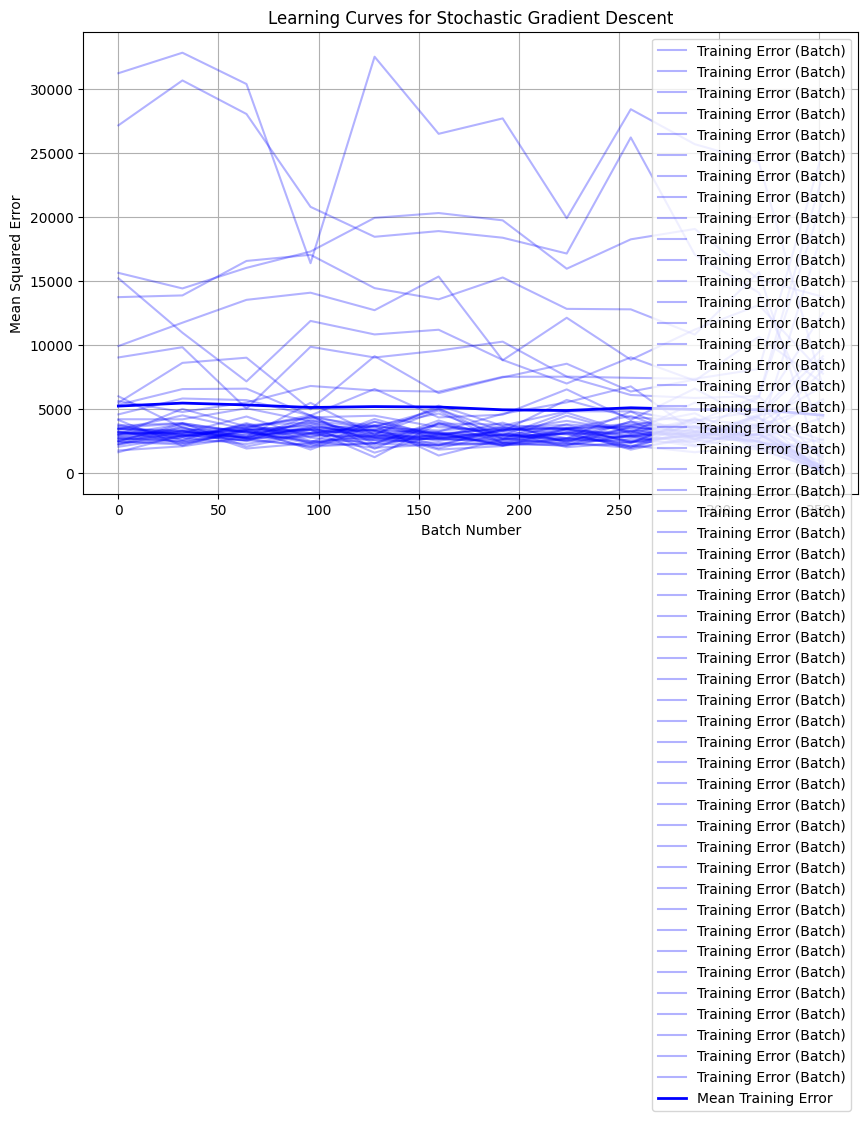

In [ ]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 4-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of epoches, batch size
# Output: the final Weights
#         the loss history along batches
def myGradientDescentFun(X,y,learning_rate,epoches, batchsize):
    num_features = X.shape[1]
    w = np.zeros(num_features)
    loss_history = []

    num_batches = int(np.ceil(len(y) / batchsize))

    for epoch in range(epoches):
        # Shuffle the data indices for each epoch
        indices = np.arange(len(y))
        np.random.shuffle(indices)

        for batch in range(num_batches):
            # Get the batch data and labels
            start_idx = batch * batchsize
            end_idx = min((batch + 1) * batchsize, len(y))
            X_batch = X[indices[start_idx:end_idx]]
            y_batch = y[indices[start_idx:end_idx]]

            # Compute predictions using the current weights
            predictions = X_batch.dot(w)

            # Compute the difference between predictions and true values
            error = predictions - y_batch

            # Compute the gradient of the loss function w.r.t. weights for this batch
            gradient = X_batch.T.dot(error) / len(y_batch)

            # Update weights using the gradient and learning rate
            w -= learning_rate * gradient

            # Calculate the mean squared error for this batch and store it in the loss history
            mse = mean_squared_error(y_batch, predictions)
            loss_history.append(mse)

    return w, loss_history

# Task 4-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return X.dot(w)

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations

learning_rate = 0.01
num_epoches = 50
batch_size = 32

w, loss = myGradientDescentFun(train_data_intercept, train_target, learning_rate, num_epoches, batch_size)

# Task 4-3: show intercept and coefficents
intercept = w[0]
coefficients = w[1:]

print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Task 4-4: show errors on training dataset and testing dataset
train_predictions = myPredictFun(train_data_intercept, w)
test_predictions = myPredictFun(test_data_intercept, w)

print("Training MSE:", 0.5 * mean_squared_error(train_target, train_predictions))
print("Testing MSE:", 0.5 * mean_squared_error(test_target, test_predictions))

# Task 4-5: plot learning curves showing training errors and testing errors along batches
num_batches = int(np.ceil(len(train_target) / batch_size))
epochs_range = np.arange(num_epoches)
batches_range = np.arange(num_batches) * batch_size

# Reshape loss for plotting learning curves
loss = np.reshape(loss, (num_epoches, num_batches))

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(batches_range, loss.T, alpha=0.3, color='blue', label='Training Error (Batch)')
plt.plot(batches_range, np.mean(loss, axis=0), color='blue', label='Mean Training Error', linewidth=2)
plt.xlabel('Batch Number')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves for Stochastic Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()